# Using python for machine learning

Importing matplotlib

In [2]:
import matplotlib.pyplot as plt

Line chart

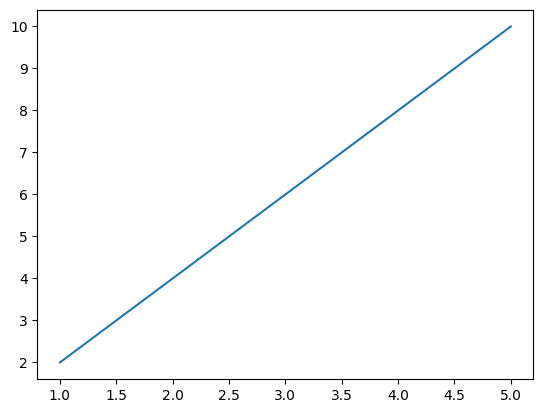

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x ,y)

plt.show()

Bar chart

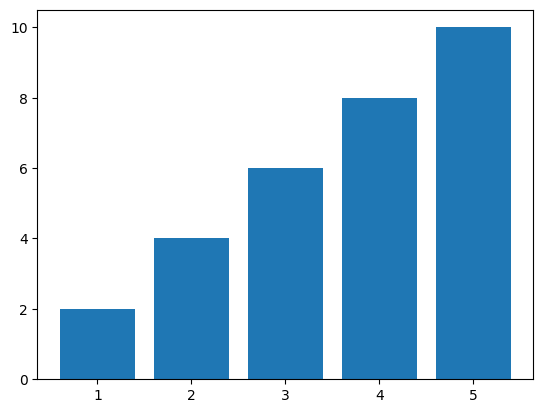

In [4]:
plt.bar(x, y)

plt.show()

Lists

In [12]:
fruits = ["apple", "banana", "STRONG ARMY WOW GRAPE"]
print(fruits[2])

fruits.append("mango")
print(fruits)

fruits.remove("apple")
print(fruits)

STRONG ARMY WOW GRAPE
['apple', 'banana', 'STRONG ARMY WOW GRAPE', 'mango']
['banana', 'STRONG ARMY WOW GRAPE', 'mango']


Labelling a dataset to be used by the model

In [9]:
import pandas as pd     # for reading the files

In [10]:
sampling_rate = 10.1725 # in Hz

activities = {
    (0, 30): 0,  # Initial Rest
    (30, 45): 1, # Activity
    (45, 60): 0, # Rest
    (60, 75): 1, # Activity
    (75, 90): 0,  # Rest
    (90, 105): 1, # Activity
    (105, 120): 0, # Rest
    (120, 150): 0, # Final Rest
}
# dictionary to define activities with time intervals
# a 1 represents an activity and a 0 represents rest.

input_file = "unlabelled_dataset.csv"
output_file = "labelled_dataset.csv"
# input and output files declared for the dataset

dataset = pd.read_csv(input_file)

dataset['Label'] = 0 # initialize a 'label' column with 0s

for (start_time, end_time), label in activities.items():
    start_index = int(start_time * sampling_rate)
    end_index = int(end_time * sampling_rate)
    dataset.loc[start_index:end_index, 'Label'] = label
# assigning appropriate labels to the dataset based on the defined activities

dataset.to_csv(output_file, index=False)
# saving the labelled dataset to a new CSV file

using the labelled dataset

In [11]:
labelled_data = pd.read_csv(output_file)
# using the labelled dataset for further processing

data = labelled_data.iloc[:, :20]
# extracting the first 20 columns of the labelled dataset for analysis

mean = data.mean(axis=1)
peak = data.max(axis=1)
minimum = data.min(axis=1)
variance = data.var(axis=1)
peek2peek = peak - minimum
# calculating various statistical features from the data

labels = labelled_data['Label']

features = pd.DataFrame({
    'Mean': mean,
    'Peak': peak,
    'Minimum': minimum,
    'Variance': variance,
    'Peek_To_Peek': peek2peek,
    'Label': labels
})
# using a DataFrame to store the calculated features for each row of data

features_file = "features.csv"
features.to_csv(features_file, index=False)

using the kNN (safe and healthy chicken) algorithm for machine learning

In [32]:
features_data = pd.read_csv(features_file)

# splitting the data into features and outputs (labels)
X = features_data.drop(columns=['Label']) # features
y = features_data['Label'] # labels

from sklearn.model_selection import train_test_split
# splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.neighbors import KNeighborsClassifier
# importing the k-NN classifier from sklearn

knn = KNeighborsClassifier(n_neighbors=3)
# initializing the k-NN classifier with 3 neighbors

knn.fit(X_train, y_train)
# training the k-NN classifier with the training data

y_pred = knn.predict(X_test)
# predicting the labels for the test set

Evaluating the model's performance

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# importing metrics to evaluate the model's performance

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))
# printing the accuracy, classification report, and confusion matrix for the model's performance evaluation

Accuracy:  0.8372093023255814
Precision:  0.8347362514029181
Recall:  0.8372093023255814
F1 Score:  0.8357078945557161
